<a href="https://colab.research.google.com/github/Umerfarooq122/Has-the-FED-been-able-to-fulfill-the-mandate-given-to-it-by-Congress/blob/main/Has_the_FED_been_able_to_fulfill_the_mandate_given_to_it_by_Congress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Has the FED been able to fulfill the mandate given to it by Congress?**

The Federal Reserve's mandate from Congress is to control inflation and to maintain low unemployment. These seem to be contradictory objectives.
For this story you will need to source the following data for the last 25 years;

*   The FED Funds Rate (FRED) (Federal Reserve Board)
*   The Consumer Price Index (CPI) (Bureau of Labor Statistics)
*   Unemployment Rate  (Bureau of Labor Statistics)



Your Data Visualizations should be designed to answer the question "Has the FED been able to fulfill the mandate given to it by Congress?"

### **Setting up the environment:**

In [ ]:
!pip install fredapi


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import fredapi as fd
import seaborn as sns
import plotly.express as px
import matplotlib.dates as mdates
from google.colab import files

### **Using API to load the data:**

To obtain the data for this study we will use https://fred.stlouisfed.org/ website with fredapi package. We will try to connect to the website using the API key provided by FRED website and then using commands from fredapi package we will try to access the required dat. Below code cells acquire CPI, unemployment rate and FED fund rate separately using different keywords and the all the data is finalized into one final data frame.

---



In [ ]:
fred = fd.Fred(api_key = '9f157e97e66932f72d7770bf55a9d686')

#### **CPI Actual Data:**

In [ ]:
cpi = fred.search('Consumer Price Index for All Urban Consumers: Used Cars and Trucks in U.S. City Average')
cpi_data = fred.get_series('CPIAUCSL')
cpi_data.name = 'values'
cpi_data.tail()

2023-04-01    302.918
2023-05-01    303.294
2023-06-01    303.841
2023-07-01    304.348
2023-08-01    306.269
Name: values, dtype: float64

In [ ]:
df1 = pd.DataFrame(cpi_data).reset_index()
df2 =df1[df1['index']>'1997-12-01']
df2.head()

,index,values
612,1998-01-01,162.0
613,1998-02-01,162.0
614,1998-03-01,162.0
615,1998-04-01,162.2
616,1998-05-01,162.6


#### **Generating Anticipated CPI Data:**

In [ ]:
start = df2['values'].iloc[0]
periods = 308


In [ ]:
def get_target_cpi(previous_cpi):
    return previous_cpi + 0.0016667*(previous_cpi)

In [ ]:
target_cpis = [start]
for year in range(0,periods):
    target_cpis.append(get_target_cpi(target_cpis[year]))

In [ ]:
tgt_cpi = pd.DataFrame(target_cpis)
tgt_cpi['index'] = pd.date_range(start='1/1/1998', periods=len(tgt_cpi), freq=pd.offsets.MonthBegin())


In [ ]:

tgt_cpi = tgt_cpi.rename(columns = {0:"cpi"})
tgt_cpi.tail()

,cpi,index
304,268.768755,2023-05-01
305,269.216712,2023-06-01
306,269.665416,2023-07-01
307,270.114867,2023-08-01
308,270.565068,2023-09-01


#### **Un-Employment Rate Data:**

In [ ]:
unemp = fred.search('Unemployment Rate')
unemp_data = fred.get_series('UNRATE')
unemp_data.name = 'values'
df3 = pd.DataFrame(unemp_data).reset_index()
df3.head()


,index,values
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


#### **Feds Fund Rate Data:**

In [ ]:
fed_rate = fred.search('Federal Funds Effective Rate')
fed_data = fred.get_series('FEDFUNDS')
fed_data.name = 'values'
df4 = pd.DataFrame(fed_data).reset_index()
df4.head()

,index,values
0,1954-07-01,0.80
1,1954-08-01,1.22
2,1954-09-01,1.07
3,1954-10-01,0.85
4,1954-11-01,0.83


#### **Finalizing the Dataframe:**

In [ ]:
df5 = df2.merge(df3, on='index', how='left')
final = df5.merge(df4, on = 'index', how = 'left')
final = final.merge(tgt_cpi, on = 'index', how = "left")
final.head()

,index,values_x,values_y,values,cpi
0,1998-01-01,162.0,4.6,5.56,162.000000
1,1998-02-01,162.0,4.6,5.51,162.270005
2,1998-03-01,162.0,4.7,5.49,162.540461
3,1998-04-01,162.2,4.3,5.45,162.811367
4,1998-05-01,162.6,4.4,5.49,163.082725


In [ ]:
final = final.rename(columns={"values_x": "cpi", "values_y": "unemp_rate", "values":"fed_rate" , "cpi":"cpi_inf"})

In [ ]:
final.head()

,index,cpi,unemp_rate,fed_rate,cpi_inf
0,1998-01-01,162.0,4.6,5.56,162.000000
1,1998-02-01,162.0,4.6,5.51,162.270005
2,1998-03-01,162.0,4.7,5.49,162.540461
3,1998-04-01,162.2,4.3,5.45,162.811367
4,1998-05-01,162.6,4.4,5.49,163.082725


# **Un-Employment Rate:**

In this section we will be looking at unemployment rate for the past 25 years and how different events alongside FEDs actions have affected the unemployment rate.

In [ ]:
high_unemp1 =df3[df3['index']>'2001-03-01' ]
high_unemp1 = high_unemp1[high_unemp1['index']<'2004-01-01']
high_unemp2 =df3[df3['index']>'2008-01-01' ]
high_unemp2 = high_unemp2[high_unemp2['index']<'2011-01-01']
high_unemp3 =df3[df3['index']>'2020-01-01' ]
high_unemp3 = high_unemp3[high_unemp3['index']<'2020-12-01']
high_unemp4 =df3[df3['index']>'2021-09-10' ]
high_unemp4 = high_unemp4[high_unemp4['index']<'2023-08-01']

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

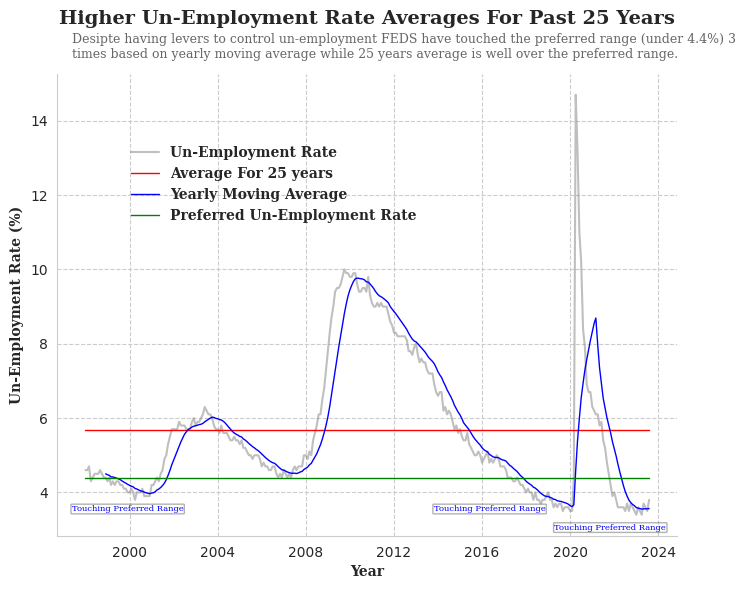

In [ ]:
ax = plt.figure(figsize=(8,6))
sns.set_style("whitegrid", {'grid.linestyle': '--'})
#Plot
ax = sns.lineplot(x="index", y= "unemp_rate", data=final, color = 'grey', alpha = .5, label = 'Un-Employment Rate',linestyle='solid')
ax = sns.lineplot( x = "index", y = final['unemp_rate'].mean(), data = final, color = 'red', label = "Average For 25 years" ,linewidth = 1, linestyle='solid',alpha = 1)
ax = sns.lineplot( x = "index", y = final['unemp_rate'].rolling(12).mean(), data = final, color = 'blue', label = "Yearly Moving Average" ,linewidth = 1,alpha = 1)
ax = sns.lineplot( x = "index", y = 4.4, data = final, color = 'green', label = "Preferred Un-Employment Rate" ,linewidth = 1, alpha = 1)

# Annotation and Labelling
ax.set_title("Higher Un-Employment Rate Averages For Past 25 Years", fontdict={'weight':'bold', 'size':14,'family':'serif'}, y = 1.09)
ax.text(10000, 15.7,"Desipte having levers to control un-employment FEDS have touched the preferred range (under 4.4%) 3 \ntimes based on yearly moving average while 25 years average is well over the preferred range.",
        fontdict={ 'size':9,'family':'serif'}, alpha = .7)
plt.ylabel("Un-Employment Rate (%)", fontdict={'weight':'bold', 'size':10,'family':'serif'})
plt.xlabel("Year", fontdict={'weight':'bold', 'size':10,'family':'serif'})
ax.legend(bbox_to_anchor=(.6,.65),loc='lower right',prop={'weight':'bold','size':10,'family':'serif'}, frameon=False)
sns.despine(bottom = False, left = False)


ax.text(10000, 3.5, "Touching Preferred Range",fontdict={ 'size':8,'family':'serif', 'color':'blue'}, rotation=0, size=6,bbox=dict(boxstyle="round, pad = .1",
                      fc="white", ec="black", lw=1, alpha = .3))
ax.text(16000, 3.5, "Touching Preferred Range",fontdict={ 'size':8,'family':'serif', 'color':'blue'}, rotation=0, size=6,bbox=dict(boxstyle="round, pad = .1",
                      fc="white", ec="black", lw=1, alpha = .3))
ax.text(18000, 3.0, "Touching Preferred Range",fontdict={ 'size':8,'family':'serif', 'color':'blue'}, rotation=0, size=6,bbox=dict(boxstyle="round, pad = .1",
                      fc="white", ec="black", lw=1, alpha = .3))
plt.savefig("Higher Un-Employment Averages For Past 25 Years")
files.download("Higher Un-Employment Averages For Past 25 Years.png")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

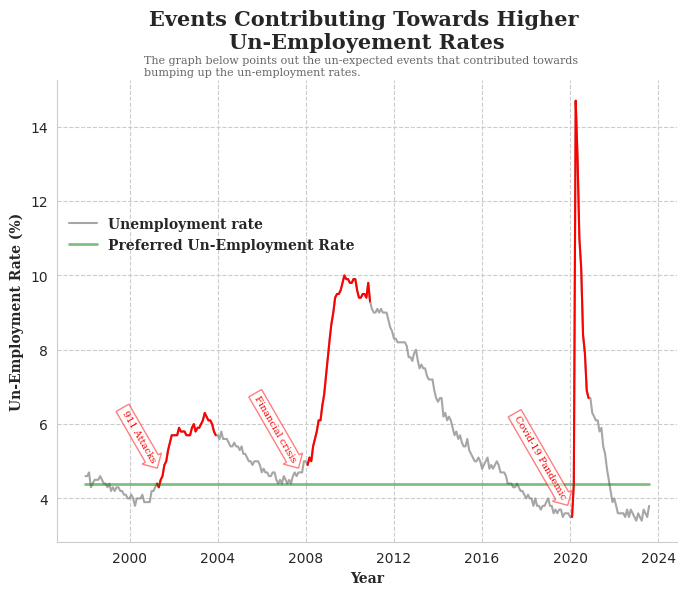

In [ ]:
ax = plt.figure(figsize=(8,6))
sns.set_style("whitegrid", {'grid.linestyle': '--'})
#Plot
ax = sns.lineplot(x="index", y= "unemp_rate", data=final, color = 'grey', alpha = .7, label = 'Unemployment rate',linestyle='solid')
ax = sns.lineplot( x= "index", y ="values", data = high_unemp1, color = "red")
ax = sns.lineplot( x= "index", y ="values", data = high_unemp2, color = "red")
ax = sns.lineplot( x= "index", y ="values", data = high_unemp3, color = "red")
ax = sns.lineplot( x = "index", y = 4.4, data = final, color = 'green', label = "Preferred Un-Employment Rate" ,linewidth = 2, alpha = .5)


#Annotation
ax.text(17300, 4, "Covid-19 Pandemic",fontdict={ 'size':10,'family':'serif', 'color':'red'}, rotation=300, size=7,bbox=dict(boxstyle="rArrow,pad=0.3",
                      fc="white", ec="red", lw=1, alpha = .5))
ax.text(13000, 5, "Financial crisis",fontdict={ 'size':10,'family':'serif', 'color':'red'}, rotation=300, size=7,bbox=dict(boxstyle="rArrow,pad=0.3",
                      fc="white", ec="red", lw=1, alpha = .5))
ax.text(10800, 5, "911 Attacks",fontdict={ 'size':10,'family':'serif', 'color':'red'}, rotation=300, size=7,bbox=dict(boxstyle="rArrow,pad=0.3",
                      fc="white", ec="red", lw=1, alpha = .5))

ax.set_title("Events Contributing Towards Higher \nUn-Employement Rates", fontdict={'weight':'bold', 'size':15,'family':'serif'}, y = 1.05)
ax.text(11200, 15.4,"The graph below points out the un-expected events that contributed towards \nbumping up the un-employment rates.",
        fontdict={ 'size':8,'family':'serif'}, alpha = .7)
ax.legend(bbox_to_anchor=(.5,.6),loc='lower right',prop={'weight':'bold','size':10,'family':'serif'}, frameon=False)
sns.despine(bottom = False, left = False)
plt.ylabel("Un-Employment Rate (%)", fontdict={'weight':'bold', 'size':10,'family':'serif'})
plt.xlabel("Year", fontdict={'weight':'bold', 'size':10,'family':'serif'})
plt.savefig("Events Contributing Towards Higher Un-Employement Rates")
files.download("Events Contributing Towards Higher Un-Employement Rates.png")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

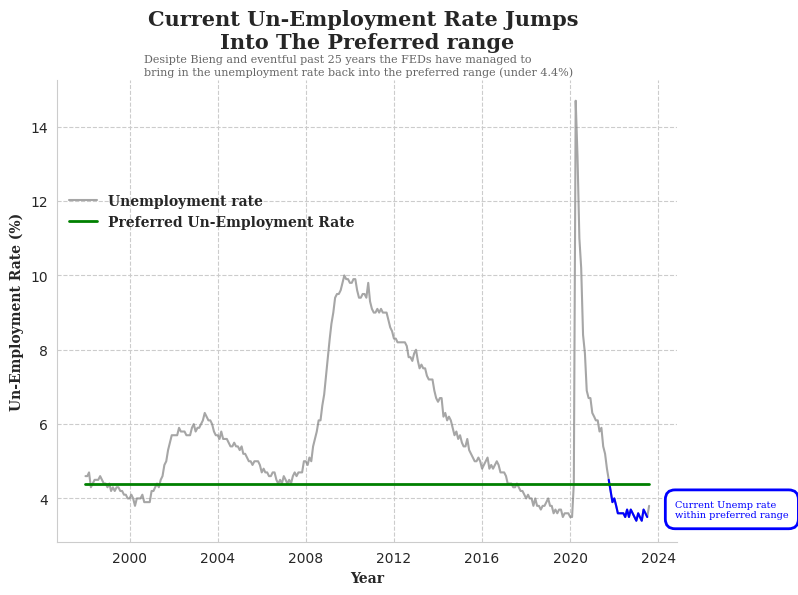

In [ ]:
ax = plt.figure(figsize=(8,6))
sns.set_style("whitegrid", {'grid.linestyle': '--'})

ax = sns.lineplot(x="index", y= "unemp_rate", data=final, color = 'grey', alpha = .7, label = 'Unemployment rate',linestyle='solid')
ax = sns.lineplot( x= "index", y ="values", data = high_unemp4, color = "blue")

ax.text(20000, 3.5, "Current Unemp rate \nwithin preferred range",fontdict={ 'size':10,'family':'serif', 'color':'blue'}, rotation=0, size=7,bbox=dict(boxstyle="round, pad = 1",
                      fc="white", ec="blue", lw=2, alpha = 1))

ax = sns.lineplot( x = "index", y = 4.4, data = final, color = 'green', label = "Preferred Un-Employment Rate" ,linewidth = 2, alpha = 1)


ax.legend(bbox_to_anchor=(.5,.65),loc='lower right',prop={'weight':'bold','size':10,'family':'serif'}, frameon=False)
sns.despine(bottom = False, left = False)

ax.set_title("Current Un-Employment Rate Jumps \nInto The Preferred range", fontdict={'weight':'bold', 'size':15,'family':'serif'}, y = 1.05)
ax.text(11200, 15.4,"Desipte Bieng and eventful past 25 years the FEDs have managed to \nbring in the unemployment rate back into the preferred range (under 4.4%)",
        fontdict={ 'size':8,'family':'serif'}, alpha = .7)
plt.ylabel("Un-Employment Rate (%)", fontdict={'weight':'bold', 'size':10,'family':'serif'})
plt.xlabel("Year", fontdict={'weight':'bold', 'size':10,'family':'serif'})
plt.savefig("Current Un-Employment Rate Jumps Into The Preferred range")
files.download("Current Un-Employment Rate Jumps Into The Preferred range.png")
plt.show()

In [ ]:
high_fed = df4[df4['index']>'2001-03-01' ]
high_fed = high_fed[high_fed['index']<'2004-01-01']

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

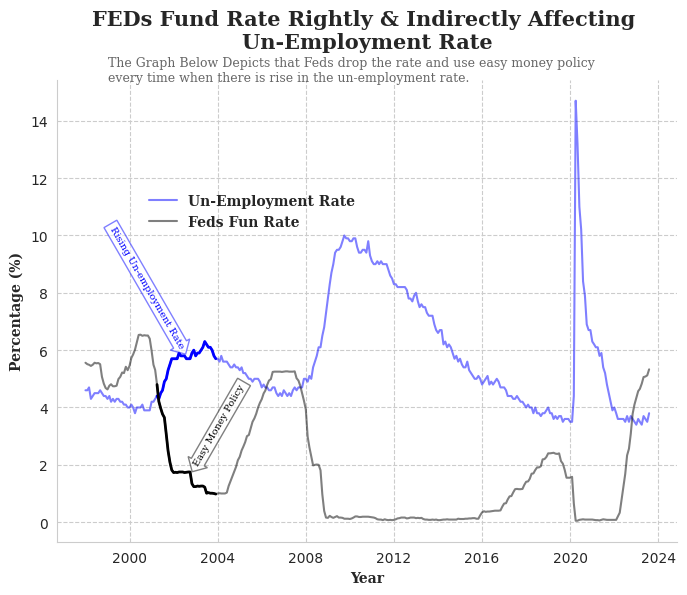

In [ ]:
ax = plt.figure(figsize=(8,6))
sns.set_style("whitegrid", {'grid.linestyle': '--'})

ax = sns.lineplot(x="index", y= "unemp_rate", data=final, color = 'blue', alpha = .5,linestyle='solid', label = "Un-Employment Rate")
ax = sns.lineplot( x="index", y="fed_rate", data=final, color = 'black', alpha = .5, linestyle='solid', label = "Feds Fun Rate")
ax = sns.lineplot( x= "index", y ="values", data = high_unemp1, color = "blue", linewidth = 2)
ax = sns.lineplot( x= "index", y ="values", data = high_fed, color = "black", linewidth  = 2)

plt.ylabel("Percentage (%)", fontdict={'weight':'bold', 'size':10,'family':'serif'})
plt.xlabel("Year", fontdict={'weight':'bold', 'size':10,'family':'serif'})
ax.text(10600, 6.1, "Rising Un-employment Rate",fontdict={ 'size':10,'family':'serif', 'color':'blue'}, rotation=300, size=7,bbox=dict(boxstyle="rArrow,pad=0.3",
                      fc="white", ec="blue", lw=1, alpha = .5))
ax.text(12000, 2, "Easy Money Policy",fontdict={ 'size':10,'family':'serif', 'color':'black'}, rotation=60, size=7,bbox=dict(boxstyle="LArrow,pad=0.3",
                      fc="white", ec="black", lw=1, alpha = .5))
ax.set_title("FEDs Fund Rate Rightly & Indirectly Affecting \nUn-Employment Rate", fontdict={'weight':'bold', 'size':15,'family':'serif'}, y = 1.05)
ax.text(10600, 15.4,"The Graph Below Depicts that Feds drop the rate and use easy money policy \nevery time when there is rise in the un-employment rate.",
        fontdict={ 'size':9,'family':'serif'}, alpha = .7)

ax.legend(bbox_to_anchor=(.5,.65),loc='lower right',prop={'weight':'bold','size':10,'family':'serif'}, frameon=False)
sns.despine(bottom = False, left = False)
plt.savefig("FEDs Fund Rate Rightly & Indirectly Affecting Un-Employment Rate")
files.download("FEDs Fund Rate Rightly & Indirectly Affecting Un-Employment Rate.png")
plt.show()

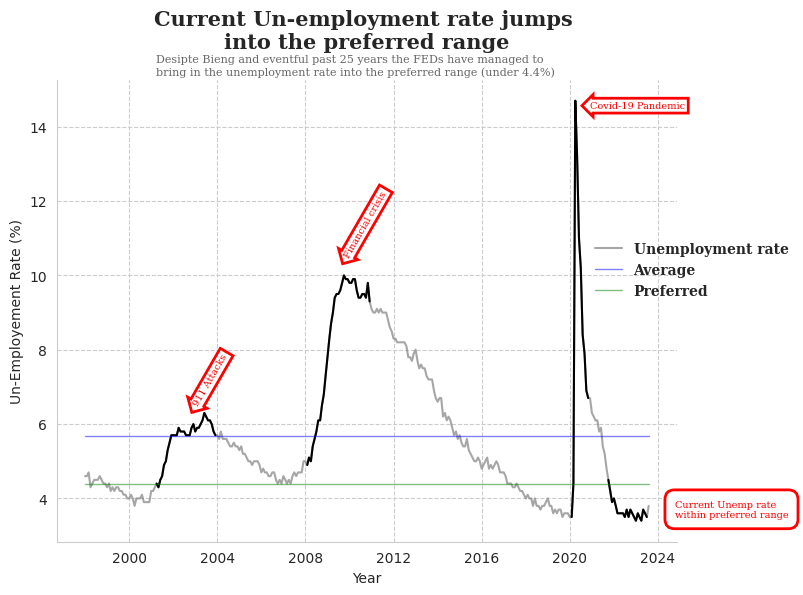

In [ ]:
sns.set_style("whitegrid", {'grid.linestyle': '--'})
ax = plt.figure(figsize=(8,6))
#Plot
ax = sns.lineplot(x="index", y= "unemp_rate", data=final, color = 'grey', alpha = .7, label = 'Unemployment rate',linestyle='solid')
ax = sns.lineplot( x= "index", y ="values", data = high_unemp1, color = "black")
ax = sns.lineplot( x= "index", y ="values", data = high_unemp2, color = "black")
ax = sns.lineplot( x= "index", y ="values", data = high_unemp3, color = "black")
ax = sns.lineplot( x= "index", y ="values", data = high_unemp4, color = "black")

#Annotation
ax.text(18600, 14.5, "Covid-19 Pandemic",fontdict={ 'size':10,'family':'serif', 'color':'red'}, rotation=0, size=7,bbox=dict(boxstyle="LArrow,pad=0.3",
                      fc="white", ec="red", lw=2, alpha = 1))
ax.text(14500, 10.5, "Financial crisis",fontdict={ 'size':10,'family':'serif', 'color':'red'}, rotation=60, size=7,bbox=dict(boxstyle="LArrow,pad=0.3",
                      fc="white", ec="red", lw=2, alpha = 1))
ax.text(12000, 6.5, "911 Attacks",fontdict={ 'size':10,'family':'serif', 'color':'red'}, rotation=60, size=7,bbox=dict(boxstyle="LArrow,pad=0.3",
                      fc="white", ec="red", lw=2, alpha = 1))
ax.text(20000, 3.5, "Current Unemp rate \nwithin preferred range",fontdict={ 'size':10,'family':'serif', 'color':'red'}, rotation=0, size=7,bbox=dict(boxstyle="round, pad = 1",
                      fc="white", ec="red", lw=2, alpha = 1))

#Thresholds
ax = sns.lineplot( x = "index", y = final['unemp_rate'].mean(), data = final, color = 'blue', label = "Average" ,linewidth = 1, alpha = .5)
ax = sns.lineplot( x = "index", y = 4.4, data = final, color = 'green', label = "Preferred" ,linewidth = 1, alpha = .5)

#Legends
ax.legend(bbox_to_anchor=(1.2,.5),loc='lower right',prop={'weight':'bold','size':10,'family':'serif'}, frameon=False)
sns.despine(bottom = False, left = False)

#Title and labels
ax.set_title("Current Un-employment rate jumps \ninto the preferred range", fontdict={'weight':'bold', 'size':15,'family':'serif'}, y = 1.05)
ax.text(11400, 15.4,"Desipte Bieng and eventful past 25 years the FEDs have managed to \nbring in the unemployment rate into the preferred range (under 4.4%)",
        fontdict={ 'size':8,'family':'serif'}, alpha = .7)
ax.set(xlabel="Year",      ylabel="Un-Employement Rate (%)")
plt.show()

# **CPI:**

In this section we will be looking at consumer price index (CPI), different factor and FEDs actions effect on CPI.

In [ ]:
high_cpi1 =df2[df2['index']>'2001-09-11' ]
high_cpi1 = high_cpi1[high_cpi1['index']<'2004-01-01']
high_cpi2 =df2[df2['index']>'2008-01-01' ]
high_cpi2 = high_cpi2[high_cpi2['index']<'2011-01-01']
high_cpi3 =df2[df2['index']>'2020-01-01' ]
high_cpi3 = high_cpi3[high_cpi3['index']<'2020-12-01']
high_cpi4 =df2[df2['index']>'2020-07-01' ]
high_cpi4 = high_cpi4[high_cpi4['index']<'2023-08-30']

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

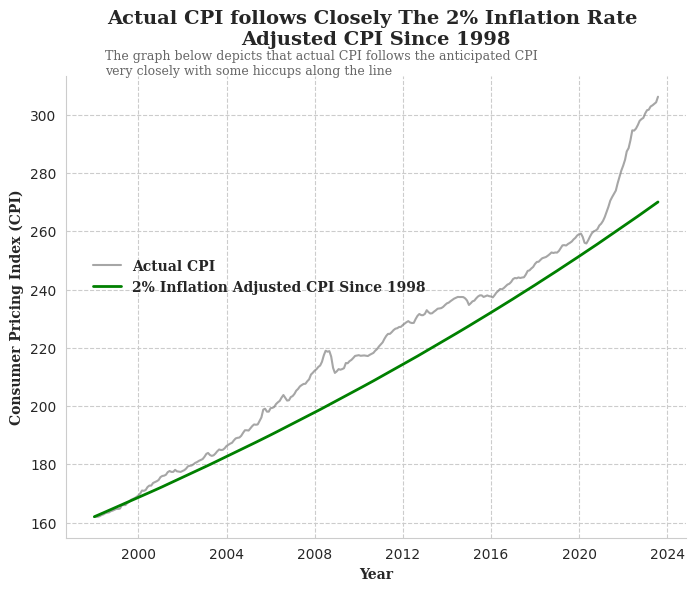

In [ ]:
ax1 = plt.figure(figsize=(8,6))
sns.set_style("whitegrid", {'grid.linestyle': '--'})

ax1 = sns.lineplot( x="index", y="cpi", data=final, color = 'grey', alpha = .7, linestyle='solid', label= "Actual CPI")
#ax1 = sns.lineplot( x="index", y=final["cpi"].rolling(24).mean(), data=final, color = 'blue', alpha = .7, linestyle='dotted', label= "2 Years Moving Average")
ax1 = sns.lineplot( x = "index", y ="cpi_inf", data = final , alpha  = 1, linewidth = 2, linestyle = 'solid', color  = "green", label = "2% Inflation Adjusted CPI Since 1998")



ax1.set_title("Actual CPI follows Closely The 2% Inflation Rate \nAdjusted CPI Since 1998", fontdict={'weight':'bold', 'size':14,'family':'serif'}, y = 1.05)
ax1.legend(bbox_to_anchor=(.6,.5),loc='lower right',prop={'weight':'bold','size':10,'family':'serif'}, frameon=False)
sns.despine(bottom = False, left = False)
ax1.text(10400, 314,"The graph below depicts that actual CPI follows the anticipated CPI \nvery closely with some hiccups along the line",
        fontdict={ 'size':9,'family':'serif'}, alpha = .7)
plt.ylabel("Consumer Pricing Index (CPI)", fontdict={'weight':'bold', 'size':10,'family':'serif'})
plt.xlabel("Year", fontdict={'weight':'bold', 'size':10,'family':'serif'})
plt.savefig("Actual CPI follows Closely The 2% Inflation Rate Adjusted CPI Since 1998")
files.download("Actual CPI follows Closely The 2% Inflation Rate Adjusted CPI Since 1998.png")
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

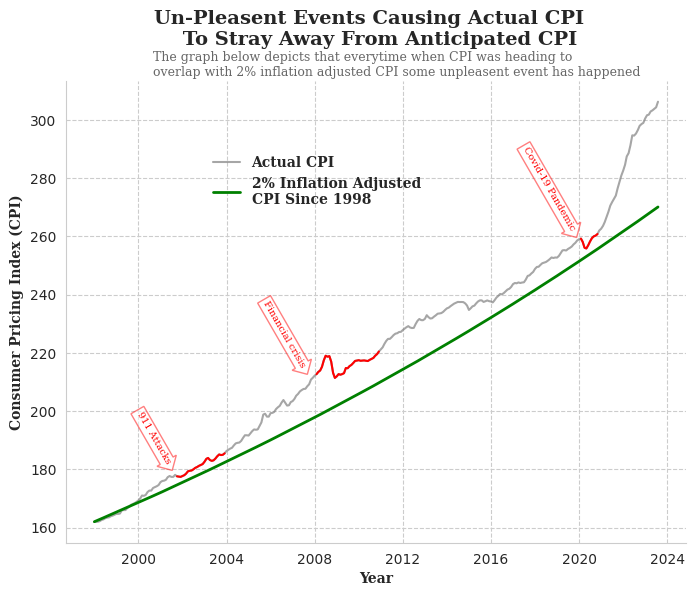

In [ ]:
ax1 = plt.figure(figsize=(8,6))
sns.set_style("whitegrid", {'grid.linestyle': '--'})

ax1 = sns.lineplot( x="index", y="cpi", data=final, color = 'grey', alpha = .7, linestyle='solid', label= "Actual CPI")
ax1 = sns.lineplot( x = "index", y ="cpi_inf", data = final , alpha  = 1, linewidth = 2, linestyle = 'solid', color  = "green", label = "2% Inflation Adjusted \nCPI Since 1998")
ax1 = sns.lineplot( x= "index", y ="values", data = high_cpi1, color = "red")
ax1 = sns.lineplot( x= "index", y ="values", data = high_cpi2, color = "red")
ax1 = sns.lineplot( x= "index", y ="values", data = high_cpi3, color = "red")

ax1.text(17300,262, "Covid-19 Pandemic",fontdict={ 'size':10,'family':'serif', 'color':'red'}, rotation=300, size=7,bbox=dict(boxstyle="rArrow,pad=0.3",
                      fc="white", ec="red", lw=1, alpha = .5))
ax1.text(13000, 215, "Financial crisis",fontdict={ 'size':10,'family':'serif', 'color':'red'}, rotation=300, size=7,bbox=dict(boxstyle="rArrow,pad=0.3",
                      fc="white", ec="red", lw=1, alpha = .5))
ax1.text(10900, 182, "911 Attacks",fontdict={ 'size':10,'family':'serif', 'color':'red'}, rotation=300, size=7,bbox=dict(boxstyle="rArrow,pad=0.3",
                      fc="white", ec="red", lw=1, alpha = .5))

plt.ylabel("Consumer Pricing Index (CPI)", fontdict={'weight':'bold', 'size':10,'family':'serif'})
plt.xlabel("Year", fontdict={'weight':'bold', 'size':10,'family':'serif'})
ax1.set_title("Un-Pleasent Events Causing Actual CPI  \n To Stray Away From Anticipated CPI", fontdict={'weight':'bold', 'size':14,'family':'serif'}, y = 1.06)
ax1.legend(bbox_to_anchor=(.6,.7),loc='lower right',prop={'weight':'bold','size':10,'family':'serif'}, frameon=False)
ax1.text(11200, 315,"The graph below depicts that everytime when CPI was heading to \noverlap with 2% inflation adjusted CPI some unpleasent event has happened",
        fontdict={ 'size':9,'family':'serif'}, alpha = .7)
sns.despine(bottom = False, left = False)
plt.savefig("Un-Pleasent Events Causing Actual CPI   To Stray Away From Anticipated CPI")
files.download("Un-Pleasent Events Causing Actual CPI   To Stray Away From Anticipated CPI.png")

plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

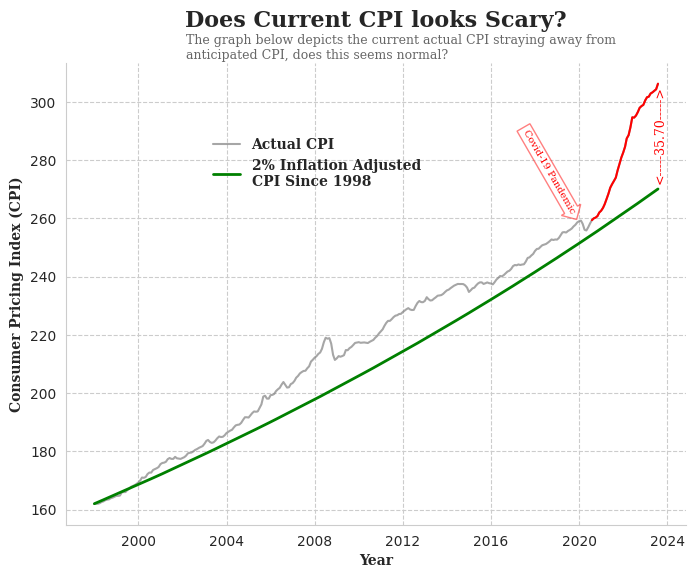

In [ ]:
ax1 = plt.figure(figsize=(8,6))
sns.set_style("whitegrid", {'grid.linestyle': '--'})

ax1 = sns.lineplot( x="index", y="cpi", data=final, color = 'grey', alpha = .7, linestyle='solid', label= "Actual CPI")
ax1 = sns.lineplot( x = "index", y ="cpi_inf", data = final , alpha  = 1, linewidth = 2, linestyle = 'solid', color  = "green", label = "2% Inflation Adjusted \nCPI Since 1998")
ax1 = sns.lineplot( x= "index", y ="values", data = high_cpi4, color = "red")


ax1.text(17300,262, "Covid-19 Pandemic",fontdict={ 'size':10,'family':'serif', 'color':'red'}, rotation=300, size=7,bbox=dict(boxstyle="rArrow,pad=0.3",
                      fc="white", ec="red", lw=1, alpha = .5))
ax1.text(19500, 273, "<-----35.70----->",fontdict={ 'size':10,'family':'serif', 'color':'red'}, rotation=90, size=9)
ax1.set_title("Does Current CPI looks Scary?", fontdict={'weight':'bold', 'size':16,'family':'serif'}, y = 1.06)
ax1.legend(bbox_to_anchor=(.6,.7),loc='lower right',prop={'weight':'bold','size':10,'family':'serif'}, frameon=False)
ax1.text(11750, 315,"The graph below depicts the current actual CPI straying away from \nanticipated CPI, does this seems normal?",
        fontdict={ 'size':9,'family':'serif'}, alpha = .7)
plt.ylabel("Consumer Pricing Index (CPI)", fontdict={'weight':'bold', 'size':10,'family':'serif'})
plt.xlabel("Year", fontdict={'weight':'bold', 'size':10,'family':'serif'})
sns.despine(bottom = False, left = False)
plt.savefig("Does Current CPI looks Scary?")
files.download("Does Current CPI looks Scary?.png")
plt.show()


In [ ]:
# For Philip Curve
ph_unemp =df3[df3['index']>'2020-07-01' ]
ph_unemp = ph_unemp[ph_unemp['index']<'2023-08-01']
ph_cpi =df2[df2['index']>'2020-07-01' ]
ph_cpi = ph_cpi[ph_cpi['index']<'2023-08-30']

philip = ph_unemp.merge(ph_cpi, on = "index", how = "left")
philip.head()

,index,values_x,values_y
0,2020-08-01,8.4,259.411
1,2020-09-01,7.9,260.029
2,2020-10-01,6.9,260.286
3,2020-11-01,6.7,260.813
4,2020-12-01,6.7,262.035


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

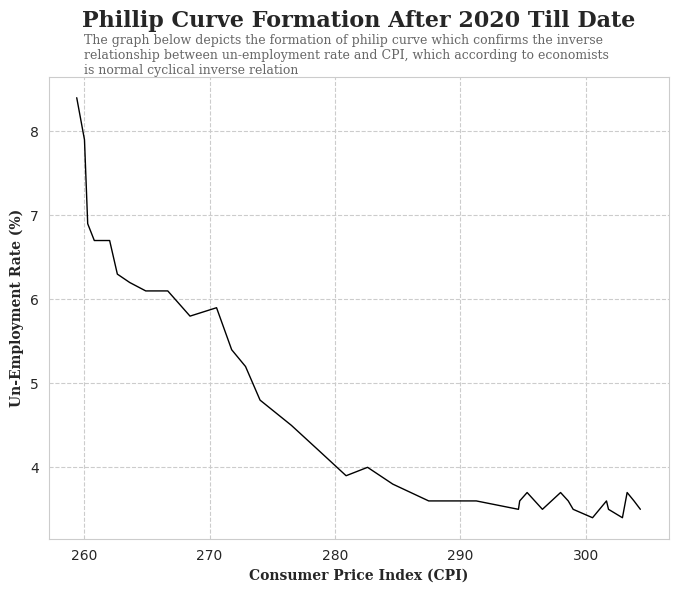

In [ ]:
sns.set_style("whitegrid", {'grid.linestyle': '--'})
ax = plt.figure(figsize=(8,6))
ax = sns.lineplot(x = "values_y", y = "values_x", data  = philip, linewidth = 1, color = "black")


ax.set_title("Phillip Curve Formation After 2020 Till Date", fontdict={'weight':'bold', 'size':16,'family':'serif'}, y = 1.09)
ax.text(260, 8.68,"The graph below depicts the formation of philip curve which confirms the inverse \nrelationship between un-employment rate and CPI, which according to economists \nis normal cyclical inverse relation",
        fontdict={ 'size':9,'family':'serif'}, alpha = .7)

plt.xlabel("Consumer Price Index (CPI)", fontdict={'weight':'bold', 'size':10,'family':'serif'})
plt.ylabel("Un-Employment Rate (%)", fontdict={'weight':'bold', 'size':10,'family':'serif'})
plt.savefig("Phillip Curve Formation After 2020 Till Date")
files.download("Phillip Curve Formation After 2020 Till Date.png")
plt.show()

In [ ]:
high_cpi =df1[df1['index']>'2003-12-01']
high_cpi = high_cpi[high_cpi['index']<'2007-11-01']

c_cpi  = df1[df1['index']>'2009-12-01']
c_cpi = c_cpi[c_cpi['index']< '2015-01-01']

In [ ]:
high_fed1 = df4[df4['index']>'2003-12-01' ]
high_fed1 = high_fed1[high_fed1['index']<'2007-11-01']

l_fed  = df4[df4['index']>'2009-12-01']
l_fed = l_fed[l_fed['index']< '2015-01-01']

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

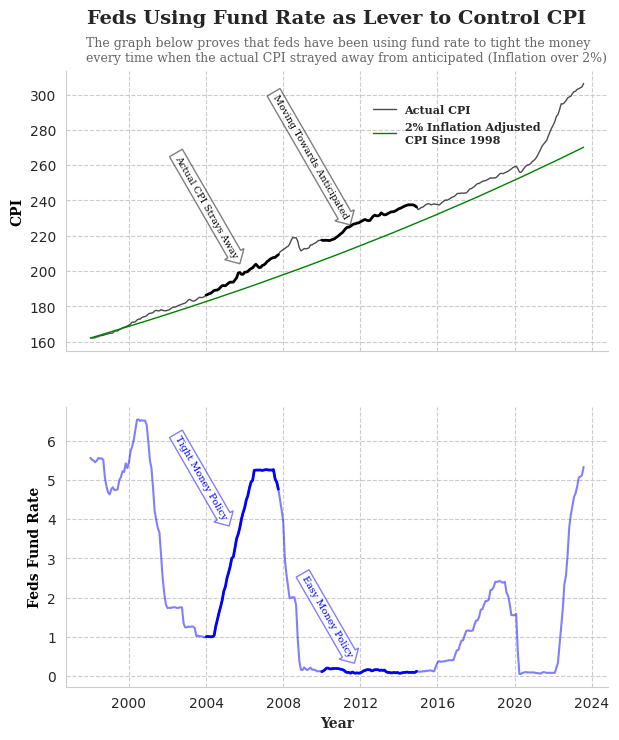

In [ ]:

fig, axes = plt.subplots(2, 1, figsize=(7, 8), sharex=True)

sns.set_style("whitegrid", {'grid.linestyle': '--'})
sns.despine(bottom = False, left = False)

# CPI
ax1 = sns.lineplot(ax=axes[0], x="index", y="cpi", data=final, color = 'black', alpha = .7, linewidth = 1 , linestyle='solid', label= "Actual CPI")
ax1 = sns.lineplot(ax = axes[0], x= "index", y ="values", data = high_cpi, color = "black", linewidth = 2)
ax1 = sns.lineplot(ax = axes[0], x= "index", y ="values", data = c_cpi, color = "black", linewidth = 2)
ax1.set_title("Feds Using Fund Rate as Lever to Control CPI", fontdict={'weight':'bold', 'size':14,'family':'serif'}, y = 1.14)
ax1 = sns.lineplot( ax = axes[0], x = "index", y ="cpi_inf", data = final , alpha  = 1, linewidth = 1, linestyle = 'solid', color= "green", label = "2% Inflation Adjusted \nCPI Since 1998")
ax1.text(11800, 208, "Actual CPI Strays Away",fontdict={ 'size':10,'family':'serif', 'color':'black'}, rotation=300, size=7,bbox=dict(boxstyle="rArrow,pad=0.3",
                      fc="white", ec="black", lw=1, alpha = .5))
ax1.text(13650, 230, "Moving Towards Anticipated",fontdict={ 'size':10,'family':'serif', 'color':'black'}, rotation=300, size=7,bbox=dict(boxstyle="rArrow,pad=0.3",
                    fc="white", ec="black", lw=1, alpha = .5))
ax1.text(10150, 319,"The graph below proves that feds have been using fund rate to tight the money \nevery time when the actual CPI strayed away from anticipated (Inflation over 2%)",
        fontdict={ 'size':9,'family':'serif'}, alpha = .7)
axes[0].set_ylabel("CPI",fontdict={ 'size':10,'family':'serif', 'color':'black', 'weight':'bold'})
ax1.legend(bbox_to_anchor=(.9,.7),loc='lower right',prop={'weight':'bold','size':8,'family':'serif'}, frameon=False)
# FED
ax2 = sns.lineplot(ax=axes[1], x="index", y="fed_rate", data=final, color = 'blue', alpha = .5, linestyle='solid')
ax2 = sns.lineplot(ax = axes[1], x= "index", y ="values", data = high_fed1, color = "blue", linewidth = 2)
ax2 = sns.lineplot(ax = axes[1], x= "index", y ="values", data = l_fed, color = "blue", linewidth = 2)
ax2.text(11800, 4, "Tight Money Policy",fontdict={ 'size':10,'family':'serif', 'color':'blue'}, rotation=300, size=7,bbox=dict(boxstyle="rArrow,pad=0.3",
                      fc="white", ec="blue", lw=1, alpha = .5))
ax2.text(14200, .5, "Easy Money Policy",fontdict={ 'size':10,'family':'serif', 'color':'blue'}, rotation=300, size=7,bbox=dict(boxstyle="rArrow,pad=0.3",
                    fc="white", ec="blue", lw=1, alpha = .5))
axes[1].set_ylabel("Feds Fund Rate",fontdict={ 'size':10,'family':'serif', 'color':'black', 'weight':'bold'})
plt.xlabel("Year", fontdict={'weight':'bold', 'size':10,'family':'serif'})

plt.savefig("Feds Using Fund Rate as Lever to Control CPI")
files.download("Feds Using Fund Rate as Lever to Control CPI.png")

plt.show()


### **Feds Fund Rate:**

In [ ]:
l_fed1 =df4[df4['index']>'2001-01-01' ]
l_fed1 = l_fed1[l_fed1['index']<'2004-01-01']
l_fed2 =df4[df4['index']>'2007-11-01' ]
l_fed2 = l_fed2[l_fed2['index']<'2016-10-01']
l_fed3 =df4[df4['index']>'2019-09-01' ]
l_fed3 = l_fed3[l_fed3['index']<'2021-12-01']
#high_cpi4 =df4[df4['index']>'2020-07-01' ]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

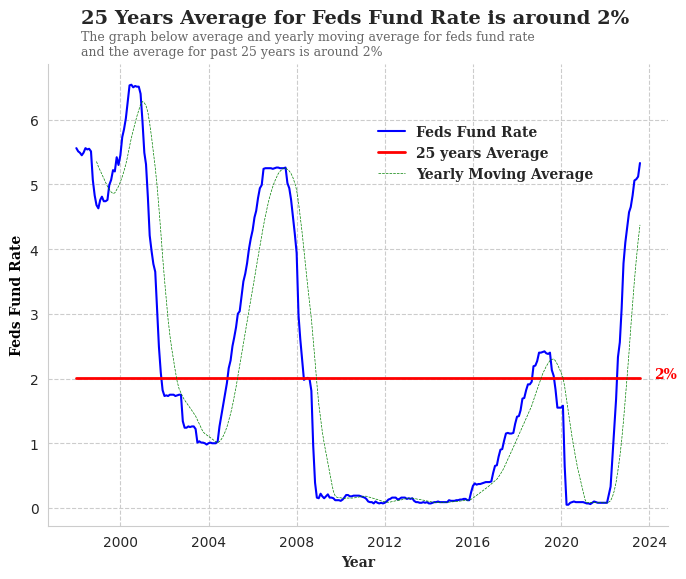

In [ ]:
sns.set_style("whitegrid", {'grid.linestyle': '--'})
ax = plt.figure(figsize=(8,6))
ax = sns.lineplot( x="index", y="fed_rate", data=final, color = 'blue', alpha = 1, linestyle='solid', label = "Feds Fund Rate")
ax = sns.lineplot( x= "index", y =final['fed_rate'].mean(), data = final, linestyle = "solid",color = "red", linewidth = 2, label = "25 years Average")
ax = sns.lineplot( x= "index", y =final['fed_rate'].rolling(12).mean(), data = final, linestyle = "dashed", color = "green", linewidth = .5, label = "Yearly Moving Average")

ax.text(10300, 7,"The graph below average and yearly moving average for feds fund rate \nand the average for past 25 years is around 2%",
        fontdict={ 'size':9,'family':'serif'}, alpha = .7)
ax.text(19800, 2,"2%",
        fontdict={ 'size':10,'family':'serif', 'color':'red', 'weight':'bold'}, alpha = 1)
ax.set_title("25 Years Average for Feds Fund Rate is around 2% ", fontdict={'weight':'bold', 'size':14,'family':'serif'}, y = 1.07)
ax.legend(bbox_to_anchor=(.9,.72),loc='lower right',prop={'weight':'bold','size':10,'family':'serif'}, frameon=False)
ax.set_ylabel("Feds Fund Rate",fontdict={ 'size':10,'family':'serif', 'color':'black', 'weight':'bold'})
ax.set_xlabel("Year", fontdict={'weight':'bold', 'size':10,'family':'serif'})
sns.despine(bottom = False, left = False)
plt.savefig("25 Years Average for Feds Fund Rate is around 2%")
files.download("25 Years Average for Feds Fund Rate is around 2%.png")

plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

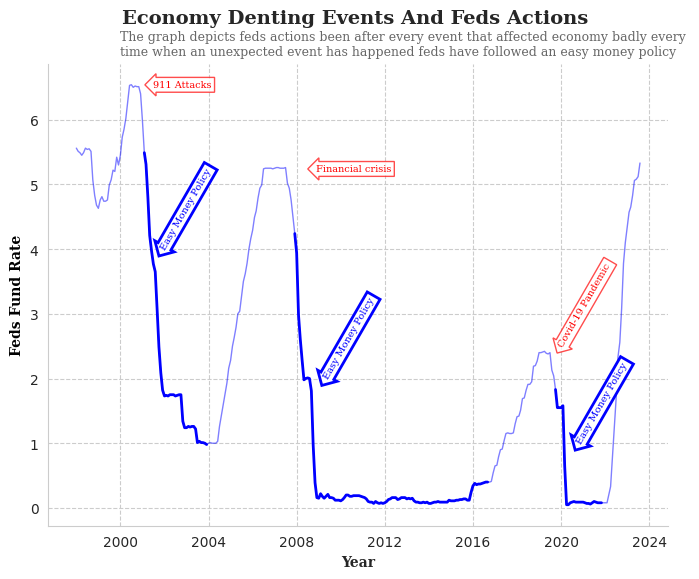

In [ ]:
sns.set_style("whitegrid", {'grid.linestyle': '--'})
ax = plt.figure(figsize=(8,6))
ax = sns.lineplot( x="index", y="fed_rate", data=final, color = 'blue', alpha = .5, linestyle='solid', linewidth = 1)
ax = sns.lineplot( x= "index", y ="values", data = l_fed1, color = "blue", linewidth = 2)
ax = sns.lineplot( x= "index", y ="values", data = l_fed2, color = "blue", linewidth = 2)
ax = sns.lineplot( x= "index", y ="values", data = l_fed3, color = "blue", linewidth = 2)

ax.text(11600, 4, "Easy Money Policy",fontdict={ 'size':10,'family':'serif', 'color':'blue'}, rotation=60, size=7,bbox=dict(boxstyle="LArrow,pad=0.3",
                      fc="white", ec="blue", lw=2, alpha = 1))
ax.text(14300, 2, "Easy Money Policy",fontdict={ 'size':10,'family':'serif', 'color':'blue'}, rotation=60, size=7,bbox=dict(boxstyle="LArrow,pad=0.3",
                      fc="white", ec="blue", lw=2, alpha = 1))
ax.text(18500, 1, "Easy Money Policy",fontdict={ 'size':10,'family':'serif', 'color':'blue'}, rotation=60, size=7,bbox=dict(boxstyle="LArrow,pad=0.3",
                      fc="white", ec="blue", lw=2, alpha = 1))

ax.text(18200, 2.5, "Covid-19 Pandemic",fontdict={ 'size':10,'family':'serif', 'color':'red'}, rotation=60, size=7,bbox=dict(boxstyle="LArrow,pad=0.3",
                      fc="white", ec="red", lw=1, alpha = .7))
ax.text(14200, 5.2, "Financial crisis",fontdict={ 'size':10,'family':'serif', 'color':'red'}, rotation=0, size=7,bbox=dict(boxstyle="LArrow,pad=0.3",
                      fc="white", ec="red", lw=1, alpha = .7))
ax.text(11500, 6.5, "911 Attacks",fontdict={ 'size':10,'family':'serif', 'color':'red'}, rotation=0, size=7,bbox=dict(boxstyle="LArrow,pad=0.3",
                      fc="white", ec="red", lw=1, alpha = .7))
ax.set_title("Economy Denting Events And Feds Actions ", fontdict={'weight':'bold', 'size':14,'family':'serif'}, y = 1.07)
ax.text(10950, 7,"The graph depicts feds actions been after every event that affected economy badly every \ntime when an unexpected event has happened feds have followed an easy money policy",
        fontdict={ 'size':9,'family':'serif'}, alpha = .7)
ax.set_ylabel("Feds Fund Rate",fontdict={ 'size':10,'family':'serif', 'color':'black', 'weight':'bold'})
ax.set_xlabel("Year", fontdict={'weight':'bold', 'size':10,'family':'serif'})

sns.despine(bottom = False, left = False)
plt.savefig("Economy Denting Events And Feds Actions")
files.download("Economy Denting Events And Feds Actions.png")

plt.show()


### **Conclusion:**

In conclusion we say that FEDs did an OKAY job. Not an excellent one but not a bad on either.

#### **Not A Great Job:**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

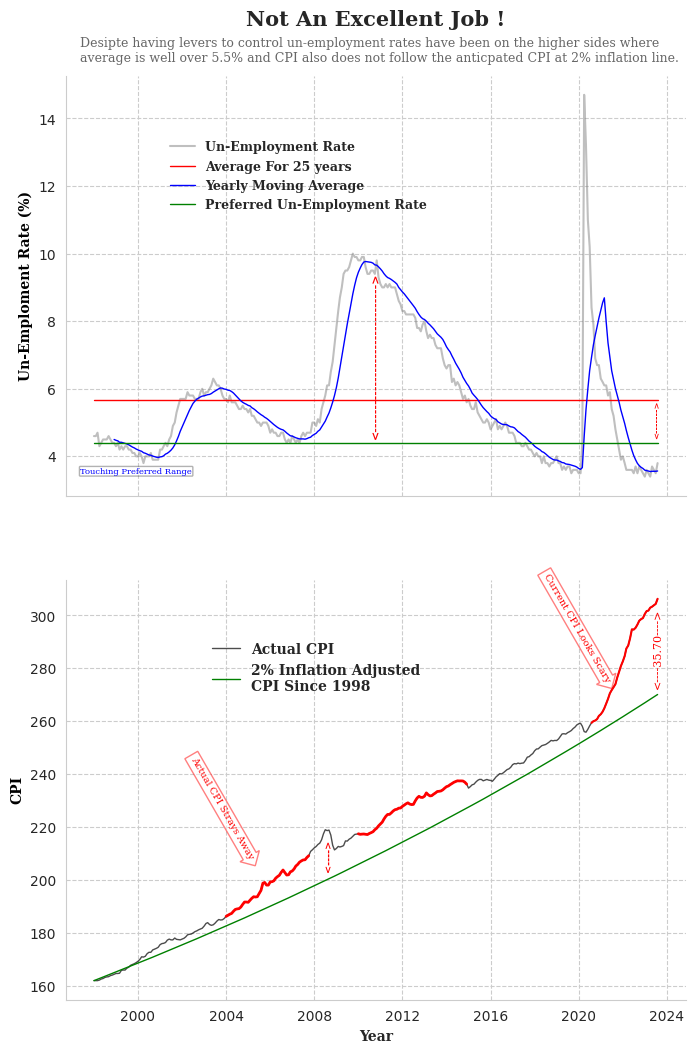

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(8, 12), sharex=True)

sns.set_style("whitegrid", {'grid.linestyle': '--'})
sns.despine(bottom = False, left = False)

#Unemp rate

ax = sns.lineplot(ax=axes[0], x="index", y= "unemp_rate", data=final, color = 'grey', alpha = .5, label = 'Un-Employment Rate',linestyle='solid')
ax = sns.lineplot(ax=axes[0],  x = "index", y = final['unemp_rate'].mean(), data = final, color = 'red', label = "Average For 25 years" ,linewidth = 1, linestyle='solid',alpha = 1)
ax = sns.lineplot(ax=axes[0],  x = "index", y = final['unemp_rate'].rolling(12).mean(), data = final, color = 'blue', label = "Yearly Moving Average" ,linewidth = 1,alpha = 1)
ax = sns.lineplot(ax=axes[0],  x = "index", y = 4.4, data = final, color = 'green', label = "Preferred Un-Employment Rate" ,linewidth = 1, alpha = 1)

# Annotation and Labelling
ax.set_title("Not An Excellent Job !", fontdict={'weight':'bold', 'size':15,'family':'serif'}, y = 1.10)
ax.text(10000, 15.7,"Desipte having levers to control un-employment rates have been on the higher sides where \naverage is well over 5.5% and CPI also does not follow the anticpated CPI at 2% inflation line.",
        fontdict={ 'size':9,'family':'serif'}, alpha = .7)

ax.legend(bbox_to_anchor=(.6,.65),loc='lower right',prop={'weight':'bold','size':9,'family':'serif'}, frameon=False)
sns.despine(bottom = False, left = False)


ax.text(10000, 3.5, "Touching Preferred Range",fontdict={ 'size':8,'family':'serif', 'color':'blue'}, rotation=0, size=6,bbox=dict(boxstyle="round, pad = .1",
                      fc="white", ec="black", lw=1, alpha = .3))
ax.text(14800, 4.6, "<-------------------------------->",fontdict={ 'size':8,'family':'serif', 'color':'red','weight':'bold'}, rotation=90, size=8)
ax.text(19500, 4.6, "<------->",fontdict={ 'size':8,'family':'serif', 'color':'red', 'weight':'bold'}, rotation=90, size=6)
axes[0].set_ylabel("Un-Emploment Rate (%)",fontdict={ 'size':10,'family':'serif', 'color':'black', 'weight':'bold'})



# CPI
ax1 = sns.lineplot(ax=axes[1], x="index", y="cpi", data=final, color = 'black', alpha = .7, linewidth = 1 , linestyle='solid', label = "Actual CPI")
ax1 = sns.lineplot(ax = axes[1], x= "index", y ="values", data = high_cpi, color = "red", linewidth = 2)
ax1 = sns.lineplot(ax = axes[1], x= "index", y ="values", data = c_cpi, color = "red", linewidth = 2)
ax1 = sns.lineplot( ax = axes[1], x = "index", y ="cpi_inf", data = final , alpha  = 1, linewidth = 1, linestyle = 'solid', color= "green", label = "2% Inflation Adjusted \nCPI Since 1998")
ax1 = sns.lineplot( ax = axes[1], x= "index", y ="values", data = high_cpi4, color = "red")
ax1.legend(bbox_to_anchor=(.6,.7),loc='lower right',prop={'weight':'bold','size':10,'family':'serif'}, frameon=False)
ax1.text(11800, 208, "Actual CPI Strays Away",fontdict={ 'size':10,'family':'serif', 'color':'red'}, rotation=300, size=7,bbox=dict(boxstyle="rArrow,pad=0.3",
                      fc="white", ec="red", lw=1, alpha = .5))
ax1.text(17650, 275, "Current CPI Looks Scary",fontdict={ 'size':10,'family':'serif', 'color':'red'}, rotation=300, size=7,bbox=dict(boxstyle="rArrow,pad=0.3",
                   fc="white", ec="red", lw=1, alpha = .5))
ax1.text(14050, 204, "<---->",fontdict={ 'size':8,'family':'serif', 'color':'red', 'weight':'bold'}, rotation=90, size=7)
ax1.text(19500, 273, "<----35.70---->",fontdict={ 'size':10,'family':'serif', 'color':'red'}, rotation=90, size=8)
axes[1].set_ylabel("CPI",fontdict={ 'size':10,'family':'serif', 'color':'black', 'weight':'bold'})
plt.xlabel("Year", fontdict={'weight':'bold', 'size':10,'family':'serif'})

plt.savefig("Not An Excellent Job !")
files.download("Not An Excellent Job !.png")
# FED
#ax2 = sns.lineplot(ax=axes[2], x="index", y="fed_rate", data=final, color = 'blue', alpha = .5, linestyle='solid')
#ax2 = sns.lineplot(ax = axes[2], x= "index", y ="values", data = high_fed1, color = "blue", linewidth = 2)
#ax2 = sns.lineplot(ax = axes[2], x= "index", y ="values", data = l_fed, color = "blue", linewidth = 2)
#ax2.text(11800, 4, "Tight Money Policy",fontdict={ 'size':10,'family':'serif', 'color':'blue'}, rotation=300, size=7,bbox=dict(boxstyle="rArrow,pad=0.3",
         #             fc="white", ec="blue", lw=1, alpha = .5))
#ax2.text(14200, .5, "Easy Money Policy",fontdict={ 'size':10,'family':'serif', 'color':'blue'}, rotation=300, size=7,bbox=dict(boxstyle="rArrow,pad=0.3",
       #             fc="white", ec="blue", lw=1, alpha = .5))
#axes[2].set_ylabel("Feds Fund Rate",fontdict={ 'size':10,'family':'serif', 'color':'black', 'weight':'bold'})



plt.show()

#### **But Not A Bad Job:**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

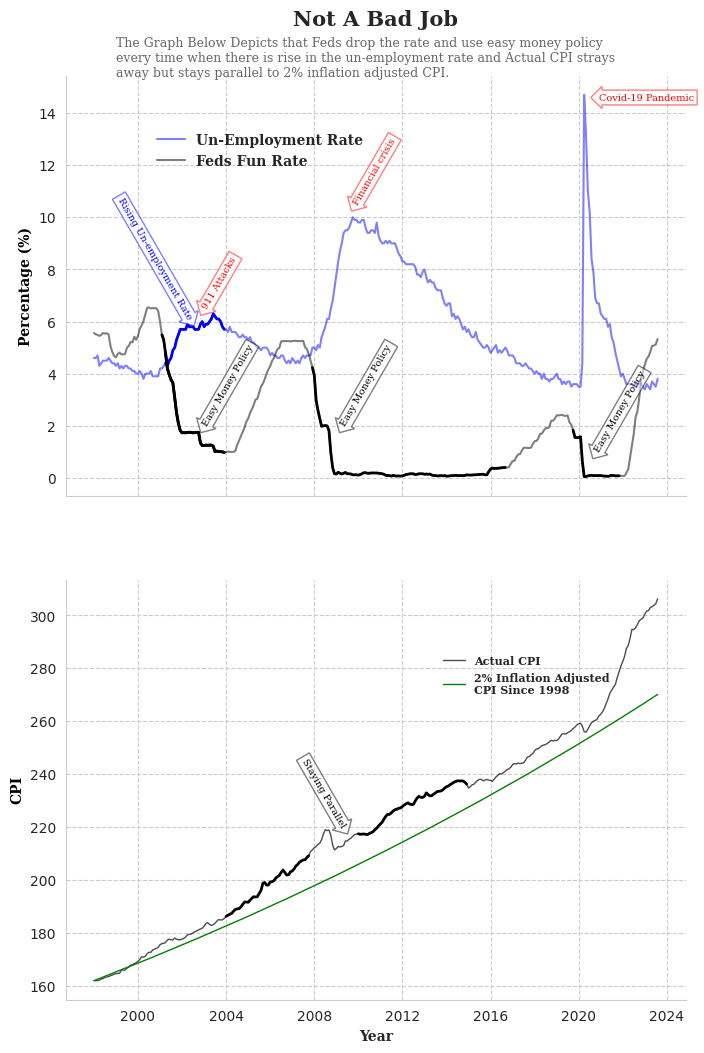

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(8, 12), sharex=True)

sns.set_style("whitegrid", {'grid.linestyle': '--'})
sns.despine(bottom = False, left = False)

ax = sns.lineplot(ax = axes[0],x="index", y= "unemp_rate", data=final, color = 'blue', alpha = .5,linestyle='solid', label = "Un-Employment Rate")
ax = sns.lineplot(ax = axes[0], x="index", y="fed_rate", data=final, color = 'black', alpha = .5, linestyle='solid', label = "Feds Fun Rate")
ax = sns.lineplot(ax = axes[0], x= "index", y ="values", data = high_unemp1, color = "blue", linewidth = 2)
ax = sns.lineplot(ax = axes[0], x= "index", y ="values", data = high_fed, color = "black", linewidth  = 2)
ax = sns.lineplot(ax = axes[0], x= "index", y ="values", data = l_fed1, color = "black", linewidth = 2)
ax = sns.lineplot(ax = axes[0], x= "index", y ="values", data = l_fed2, color = "black", linewidth = 2)
ax = sns.lineplot(ax = axes[0], x= "index", y ="values", data = l_fed3, color = "black", linewidth = 2)

plt.ylabel("Percentage (%)", fontdict={'weight':'bold', 'size':10,'family':'serif'})
plt.xlabel("Year", fontdict={'weight':'bold', 'size':10,'family':'serif'})
ax.text(10600, 6.1, "Rising Un-employment Rate",fontdict={ 'size':10,'family':'serif', 'color':'blue'}, rotation=300, size=7,bbox=dict(boxstyle="rArrow,pad=0.3",
                      fc="white", ec="blue", lw=1, alpha = .5))
ax.text(12000, 2, "Easy Money Policy",fontdict={ 'size':10,'family':'serif', 'color':'black'}, rotation=60, size=7,bbox=dict(boxstyle="LArrow,pad=0.3",
                      fc="white", ec="black", lw=1, alpha = .5))
ax.set_title("Not A Bad Job", fontdict={'weight':'bold', 'size':15,'family':'serif'}, y = 1.1)
ax.text(10600, 15.4,"The Graph Below Depicts that Feds drop the rate and use easy money policy \nevery time when there is rise in the un-employment rate and Actual CPI strays \naway but stays parallel to 2% inflation adjusted CPI.",
        fontdict={ 'size':9,'family':'serif'}, alpha = .7)
ax.text(14500, 10.5, "Financial crisis",fontdict={ 'size':10,'family':'serif', 'color':'red'}, rotation=60, size=7,bbox=dict(boxstyle="LArrow,pad=0.3",
                      fc="white", ec="red", lw=1, alpha = .5))
ax.text(12000, 6.5, "911 Attacks",fontdict={ 'size':10,'family':'serif', 'color':'red'}, rotation=60, size=7,bbox=dict(boxstyle="LArrow,pad=0.3",
                      fc="white", ec="red", lw=1, alpha = .5))
ax.text(18600, 14.5, "Covid-19 Pandemic",fontdict={ 'size':10,'family':'serif', 'color':'red'}, rotation=0, size=7,bbox=dict(boxstyle="LArrow,pad=0.3",
                      fc="white", ec="red", lw=1, alpha = .5))


ax.text(14300, 2, "Easy Money Policy",fontdict={ 'size':10,'family':'serif', 'color':'black'}, rotation=60, size=7,bbox=dict(boxstyle="LArrow,pad=0.3",
                      fc="white", ec="black", lw=1, alpha = .5))
ax.text(18500, 1, "Easy Money Policy",fontdict={ 'size':10,'family':'serif', 'color':'black'}, rotation=60, size=7,bbox=dict(boxstyle="LArrow,pad=0.3",
                      fc="white", ec="black", lw=1, alpha = .5))
ax.legend(bbox_to_anchor=(.5,.75),loc='lower right',prop={'weight':'bold','size':10,'family':'serif'}, frameon=False)
sns.despine(bottom = False, left = False)
axes[0].set_ylabel("Percentage (%)",fontdict={ 'size':10,'family':'serif', 'color':'black', 'weight':'bold'})

#CPI
ax1 = sns.lineplot(ax=axes[1], x="index", y="cpi", data=final, color = 'black', alpha = .7, linewidth = 1 , linestyle='solid', label= "Actual CPI")
ax1 = sns.lineplot(ax = axes[1], x= "index", y ="values", data = high_cpi, color = "black", linewidth = 2)
ax1 = sns.lineplot(ax = axes[1], x= "index", y ="values", data = c_cpi, color = "black", linewidth = 2)

ax1 = sns.lineplot( ax = axes[1], x = "index", y ="cpi_inf", data = final , alpha  = 1, linewidth = 1, linestyle = 'solid', color= "green", label = "2% Inflation Adjusted \nCPI Since 1998")

ax1.text(13650, 220, "Staying Parallel",fontdict={ 'size':10,'family':'serif', 'color':'black'}, rotation=300, size=7,bbox=dict(boxstyle="rArrow,pad=0.3",
                    fc="white", ec="black", lw=1, alpha = .5))

axes[1].set_ylabel("CPI",fontdict={ 'size':10,'family':'serif', 'color':'black', 'weight':'bold'})
ax1.legend(bbox_to_anchor=(.9,.7),loc='lower right',prop={'weight':'bold','size':8,'family':'serif'}, frameon=False)

plt.savefig("Not A Bad Job")
files.download("Not A Bad Job.png")

plt.show()